<a href="https://colab.research.google.com/github/vcdemy/20231019/blob/main/20231020%E7%AD%86%E8%A8%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20231020筆記

## 練習:

用萌典API寫一個中文辭典

API連結: https://www.moedict.tw/uni/

In [ ]:
import requests

In [ ]:
q = "教室"
url = f" https://www.moedict.tw/uni/{q}"

In [ ]:
url

' https://www.moedict.tw/uni/教室'

In [ ]:
data = requests.get(url, verify=False).json()

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.moedict.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [ ]:
data['heteronyms'][0]['definitions'][0]['def']

'學校裡進行教學活動的房間。'

In [ ]:
def lookup(word):
  url = f" https://www.moedict.tw/uni/{word}"
  data = requests.get(url, verify=False).json()
  return data['heteronyms'][0]['definitions'][0]['def']

In [ ]:
lookup('老師')

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1100: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.moedict.tw'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


'對傳授道業、學問或技藝者的尊稱。'

In [ ]:
# 如果已經有 gradio 就不用再安裝
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
gr.Interface(lookup, 'text', 'text').launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://26f509d4802d9e9bcc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## 容器型別複習

* list
* tuple
* dict
* set

In [ ]:
x = list('abcde')

In [ ]:
x

['a', 'b', 'c', 'd', 'e']

In [ ]:
x.append?

In [ ]:
x.append(123)

In [ ]:
x

['a', 'b', 'c', 'd', 'e', 123]

In [ ]:
y = tuple('abcde')

In [ ]:
y

('a', 'b', 'c', 'd', 'e')

In [ ]:
y.count?

In [ ]:
y.count('b')

1

In [ ]:
y.index?

In [ ]:
y.index('d')

3

In [ ]:
z = (1, 2)

In [ ]:
type(z)

tuple

In [ ]:
w = 3, 4

In [ ]:
type(w)

tuple

In [ ]:
w

(3, 4)

In [ ]:
a, b = w

In [ ]:
a

3

In [ ]:
b

4

In [ ]:
u = (1)

In [ ]:
type(u)

int

In [ ]:
v = (1,)

In [ ]:
type(v)

tuple

## 基本語法

* if statements (條件式)
* loops (迴圈)
* functions (函式)
* Exception Handling (例外處理)

### if statements (條件式)

In [ ]:
a = 2
b = 2

In [ ]:
if a > b:
  print('a 大於 b')

a 大於 b


In [ ]:
if a > b:
  print('a 大於 b')
else:
  print('a 沒有大於 b')

a 沒有大於 b


In [ ]:
if a > b:
  print('a 大於 b')
elif a < b:
  print('a 小於 b')
else:
  print('a 等於 b')

a 等於 b


# 練習: (計算BMI)

輸入身高(公尺)、體重(公斤)，計算BMI，然後判斷健康狀況。

$ bmi = \frac{體重(公斤)}{身高(公尺)^2}$

|bmi|健康狀況|
|:-:|:-:|
|bmi<18.5|體重太輕|
|18.5<=bmi<24|健康體重|
|bmi>=24|體重太重|

上面的equation的markdown寫法！
equation的部分可以參考：
https://en.wikibooks.org/wiki/LaTeX/Mathematics

<pre>
$ bmi = \frac{體重(公斤)}{身高(公尺)^2}$

|bmi|健康狀況|
|:-:|:-:|
|bmi<18.5|體重太輕|
|18.5<=bmi<24|健康體重|
|bmi>=24|體重太重|
</pre>

In [ ]:
h = 1.83
w = 80
bmi = 80/(1.83**2)

In [ ]:
bmi

23.888440980620498

In [ ]:
if bmi < 18.5:
  print('體重太輕')
elif bmi >= 24:
  print('體重太重')
else:
  print('健康體重')

健康體重


In [ ]:
def health(h, w):
  bmi = w/(h**2)
  if bmi < 18.5:
    return '體重太輕'
  elif bmi >= 24:
    return '體重太重'
  else:
    return '健康體重'

In [ ]:
# return 跟 print 的差別在有沒有傳東西回 x
x = health(1.83, 80)

In [ ]:
x

'健康體重'

In [ ]:
gr.Interface(health, ["number","number"], "text").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://daa409706ccdad5b6d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
def health01(h, w):
  bmi = w/(h**2)
  if bmi < 18.5:
    return bmi, '體重太輕'
  elif bmi >= 24:
    return bmi, '體重太重'
  else:
    return bmi, '健康體重'

In [ ]:
gr.Interface(health01, ["number","number"], ["number","text"]).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1c11ed8fcf81d1b6a3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### 例外處理 (Exception Handling)

In [ ]:
def add(a, b):
  print(f"{a} + {b} = {a+b}")

def sub(a, b):
  print(f"{a} - {b} = {a-b}")

def mul(a, b):
  print(f"{a} * {b} = {a*b}")

def div(a, b):
  print(f"{a} / {b} = {a/b}")

In [ ]:
fns = [add, sub, div, mul]

In [ ]:
for fn in fns:
  fn(1, 2)

1 + 2 = 3
1 - 2 = -1
1 / 2 = 0.5
1 * 2 = 2


In [ ]:
for fn in fns:
  fn(2, 0)

2 + 0 = 2
2 - 0 = 2


ZeroDivisionError: ignored

In [ ]:
for fn in fns:
  try:
    fn(2, 0)
  except Exception as e:
    print(e.args)

2 + 0 = 2
2 - 0 = 2
('division by zero',)
2 * 0 = 0


In [ ]:
f = open('abc.text')
data = f.read()
f.close()

FileNotFoundError: ignored

In [ ]:
try:
  f = open('abc.text')
  data = f.read()
  f.close()
except:
  data = ""

In [ ]:
data

''

In [ ]:
d = {'cat':'貓咪'}
d['dog']

KeyError: ignored

## 資料分析簡介

* numpy: 科學運算基礎套件
* matplotlib: 繪圖基礎套件
* pandas: 資料分析基礎套件

套件載入慣例:

```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
```

<pre>
```python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
```
</pre>

### NumPy (Numerical Python)

* ndarray (N-Dimensional Array)
* ufunc (Universal Functions)

In [1]:
import numpy as np

#### ndarray

In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]

In [ ]:
x + y

[1, 2, 3, 4, 5, 6]

In [ ]:
x*2

[1, 2, 3, 1, 2, 3]

In [ ]:
x1 = np.array(x)
y1 = np.array(y)

In [ ]:
x1

array([1, 2, 3])

In [ ]:
y1

array([4, 5, 6])

In [ ]:
x1 + y1

array([5, 7, 9])

In [ ]:
x1 * 2

array([2, 4, 6])

#### 顯示ndarray的屬性

In [ ]:
x1

array([1, 2, 3])

In [ ]:
x1.dtype

dtype('int64')

In [ ]:
x1.shape

(3,)

#### ndarray的操作

In [ ]:
# np.arange()類似range()的ndarray版
np.arange(25)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [2]:
G = np.arange(25)

In [3]:
G

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [4]:
G.shape

(25,)

In [5]:
G.shape = 5, 5

In [6]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [7]:
L = [[ 0,  1,  2,  3,  4],
     [ 5,  6,  7,  8,  9],
     [10, 11, 12, 13, 14],
     [15, 16, 17, 18, 19],
     [20, 21, 22, 23, 24]]

##### indexing & slicing

In [ ]:
len?

In [8]:
# len會回傳L裡面的element的個數
len(L)

5

In [10]:
L[2]

[10, 11, 12, 13, 14]

In [11]:
L[2][2]

12

In [12]:
G[2][2]

12

In [13]:
L

[[0, 1, 2, 3, 4],
 [5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14],
 [15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24]]

In [14]:
L[1:3][1:3]

[[10, 11, 12, 13, 14]]

In [15]:
L[1:3]

[[5, 6, 7, 8, 9], [10, 11, 12, 13, 14]]

In [16]:
G[1:3][1:3]

array([[10, 11, 12, 13, 14]])

In [17]:
G[1:3, 1:3]

array([[ 6,  7],
       [11, 12]])

In [18]:
G[2, 2]

12

In [19]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [22]:
import plotly.express as px

In [25]:
px.imshow(G, color_continuous_scale='gray')

In [26]:
G

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [31]:
G[0] = 0
G[:, 0] = 0
G[-1] = 0
G[:, -1] = 0

In [32]:
G

array([[ 0,  0,  0,  0,  0],
       [ 0,  6,  7,  8,  0],
       [ 0, 11, 12, 13,  0],
       [ 0, 16, 17, 18,  0],
       [ 0,  0,  0,  0,  0]])

In [33]:
px.imshow(G, color_continuous_scale='gray')

In [37]:
import gradio as gr

In [35]:
def process(image):
  image[:,:,1:] = 0
  return image

In [38]:
gr.Interface(process, "image", "image").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://3e9003c6af9346447c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [88]:
np.arange(25).dtype

dtype('int64')

In [89]:
R = np.arange(25).reshape(5, 5)*10

In [90]:
R

array([[  0,  10,  20,  30,  40],
       [ 50,  60,  70,  80,  90],
       [100, 110, 120, 130, 140],
       [150, 160, 170, 180, 190],
       [200, 210, 220, 230, 240]])

In [91]:
R.dtype

dtype('int64')

In [92]:
R = R.astype("uint8")

In [61]:
G = np.arange(25)[::-1].reshape(5, 5)*10

In [80]:
G = R.astype("uint8")

In [97]:
B = np.zeros_like(G)

In [98]:
B = B + 255

In [99]:
B = B.astype('uint8')

In [101]:
RGB = np.dstack((R, G, B))

In [102]:
RGB[0, 0]

array([  0,   0, 255], dtype=uint8)

In [103]:
px.imshow(RGB)

In [85]:
def process(image):
  m, n = image.shape[:2]
  return image[m//3:m*2//3, n//3:n*2//3]

In [86]:
gr.Interface(process, "image", "image").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://e478f0b022e03527ba.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [115]:
gr.Interface(process, "webcam", "image").launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://385c39a3e179e69784.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


#### ndarray的加法及乘法

In [104]:
x = [1, 2, 3]

In [105]:
y = [4, 5, 6]

In [106]:
x1 = np.array(x)
y1 = np.array(y)

In [108]:
x1 + y1

array([5, 7, 9])

In [109]:
x1 * 2

array([2, 4, 6])

In [110]:
x1 + 10

array([11, 12, 13])

In [111]:
x1 = x1 + 10

In [112]:
x1

array([11, 12, 13])

In [113]:
x1 = 10

In [114]:
x1

10

### ufunc

In [117]:
import math

In [118]:
math.sin(math.pi/2)

1.0

In [116]:
x

[1, 2, 3]

In [119]:
math.sin(x)

TypeError: ignored

In [120]:
np.sin(np.pi/2)

1.0

In [121]:
np.sin(x)

array([0.84147098, 0.90929743, 0.14112001])

### pandas

* Series
* DataFrame

In [123]:
!pip install yfinance

In [124]:
import yfinance as yf

In [131]:
df = yf.download('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [132]:
type(df)

pandas.core.frame.DataFrame

#### 檢視資料

In [138]:
df.head?

In [135]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [136]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-13,258.899994,259.600006,250.220001,251.119995,251.119995,102073800
2023-10-16,250.050003,255.399994,248.479996,253.919998,253.919998,88917200
2023-10-17,250.100006,257.179993,247.080002,254.850006,254.850006,93562900
2023-10-18,252.699997,254.630005,242.080002,242.679993,242.679993,125147800
2023-10-19,225.949997,230.610001,216.779999,220.110001,220.110001,170110800


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3351 entries, 2010-06-29 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3351 non-null   float64
 1   High       3351 non-null   float64
 2   Low        3351 non-null   float64
 3   Close      3351 non-null   float64
 4   Adj Close  3351 non-null   float64
 5   Volume     3351 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 183.3 KB


In [139]:
df[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


#### 讀取單一個欄位

In [140]:
df['Close']

Date
2010-06-29      1.592667
2010-06-30      1.588667
2010-07-01      1.464000
2010-07-02      1.280000
2010-07-06      1.074000
                 ...    
2023-10-13    251.119995
2023-10-16    253.919998
2023-10-17    254.850006
2023-10-18    242.679993
2023-10-19    220.110001
Name: Close, Length: 3351, dtype: float64

In [141]:
type(df['Close'])

pandas.core.series.Series

#### 同時讀取多個欄位

In [143]:
df[['Open', 'Close']]

,Open,Close
Date,,
2010-06-29,1.266667,1.592667
2010-06-30,1.719333,1.588667
2010-07-01,1.666667,1.464000
2010-07-02,1.533333,1.280000
2010-07-06,1.333333,1.074000
...,...,...
2023-10-13,258.899994,251.119995
2023-10-16,250.050003,253.919998
2023-10-17,250.100006,254.850006


In [144]:
type(df[['Open', 'Close']])

pandas.core.frame.DataFrame

In [145]:
df[['Close']]

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2023-10-13,251.119995
2023-10-16,253.919998
2023-10-17,254.850006


In [146]:
type(df[['Close']])

pandas.core.frame.DataFrame

#### 計算第一天就買進持有到目前為止的投資報酬率？

In [149]:
df['Close'][-1]/df['Close'][0]

138.2021495241971

#### 繪製收盤股價曲線

In [152]:
%matplotlib inline

<Axes: xlabel='Date'>

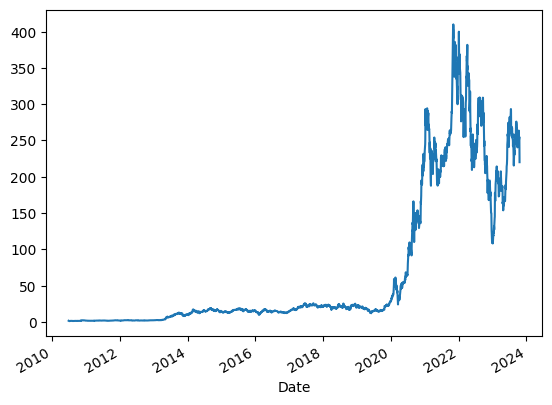

In [153]:
df['Close'].plot()

In [154]:
import plotly.express as px

In [155]:
px.line(df, y='Close')

In [156]:
px.line(df, y=['Open', 'Close'])

In [158]:
# 畫出最後50筆資料
px.line(df.tail(50), y=['Open', 'Close'])

#### 請計算2020年的投資報酬率

In [160]:
df['2020']

<ipython-input-160-348d00a3c84f>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500
...,...,...,...,...,...,...
2020-12-24,214.330002,222.029999,213.666672,220.589996,220.589996,68596800
2020-12-28,224.836670,227.133331,220.266663,221.229996,221.229996,96835800
2020-12-29,220.333328,223.300003,218.333328,221.996674,221.996674,68732400


In [161]:
df['2020']['Close'][-1]

<ipython-input-161-f3e733ff8ef8>:1: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



235.22332763671875

In [162]:
df.loc['2020']['Close'][-1]

235.22332763671875

In [163]:
df.loc['2020']['Close'][-1]/df.loc['2020']['Close'][0]

8.200506467423963

#### 計算2010年以來，每一年的投資報酬率

In [164]:
for i in range(2010, 2024):
  print(i)

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [166]:
for i in range(2010, 2024):
  ret = df.loc[str(i)]['Close'][-1]/df.loc[str(i)]['Close'][0]
  print(i, '==>', ret)

2010 ==> 1.1146919382326346
2011 ==> 1.0728773440103994
2012 ==> 1.2061965396956114
2013 ==> 4.2542431147774264
2014 ==> 1.4817454450219967
2015 ==> 1.0943869435813898
2016 ==> 0.9564925633701342
2017 ==> 1.4348587551998524
2018 ==> 1.038280294369463
2019 ==> 1.3489293766859665
2020 ==> 8.200506467423963
2021 ==> 1.4481001179959765
2022 ==> 0.3080064689288968
2023 ==> 2.036170247153569


## Teachable Machine 使用簡介

In [167]:
!unzip converted_keras.zip

Archive:  converted_keras.zip
 extracting: keras_model.h5          
 extracting: labels.txt              


In [ ]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("keras_Model.h5", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open("<IMAGE_PATH>").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


In [171]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

def process(image):
  np.set_printoptions(suppress=True)

  model = load_model("keras_model.h5", compile=False)

  class_names = open("labels.txt", "r").readlines()

  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

  # image = Image.open("<IMAGE_PATH>").convert("RGB")
  image = Image.fromarray(image)

  size = (224, 224)
  image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

  image_array = np.asarray(image)

  normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

  data[0] = normalized_image_array

  prediction = model.predict(data)
  index = np.argmax(prediction)
  class_name = class_names[index]
  confidence_score = prediction[0][index]

  print("Class:", class_name[2:], end="")
  print("Confidence Score:", confidence_score)

  return class_name[2:], confidence_score

In [173]:
gr.Interface(process, "webcam", ['text', 'number']).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://63231e151d5e68a41f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
